In [21]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas_datareader.data as data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import yfinance as yf

ticker = 'AAPL'

data = yf.download(ticker, period='7d', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [25]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-05,164.740005,165.050003,161.800003,163.759995,163.759995,51511700
2023-04-06,162.429993,164.960007,162.000000,164.660004,164.660004,45390100
2023-04-10,161.419998,162.029999,160.080002,162.029999,162.029999,47716900
2023-04-11,162.350006,162.360001,160.509995,160.800003,160.800003,47644200
2023-04-12,161.220001,162.059998,159.779999,160.100006,160.100006,50133100


<AxesSubplot:xlabel='Date'>

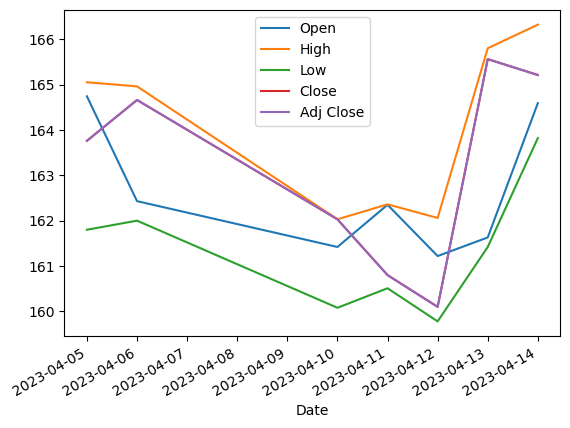

In [26]:
df = data
df = df.drop('Volume', axis=1)

df.plot()

In [27]:
pip install mplfinance

Note: you may need to restart the kernel to use updated packages.


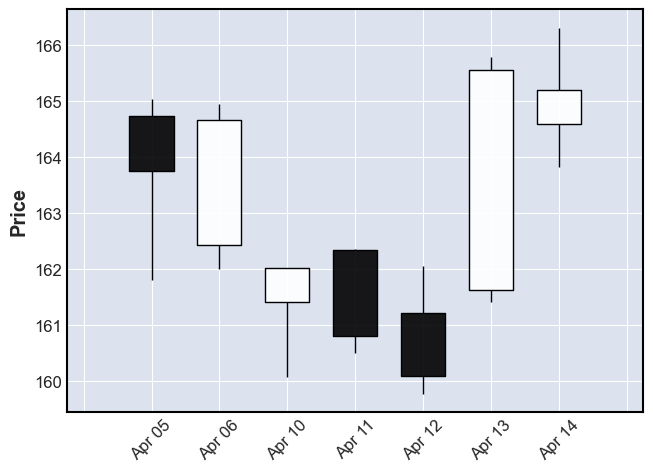

In [29]:
import mplfinance as mpf

mpf.plot(df, type='candle')

[*********************100%***********************]  1 of 1 completed


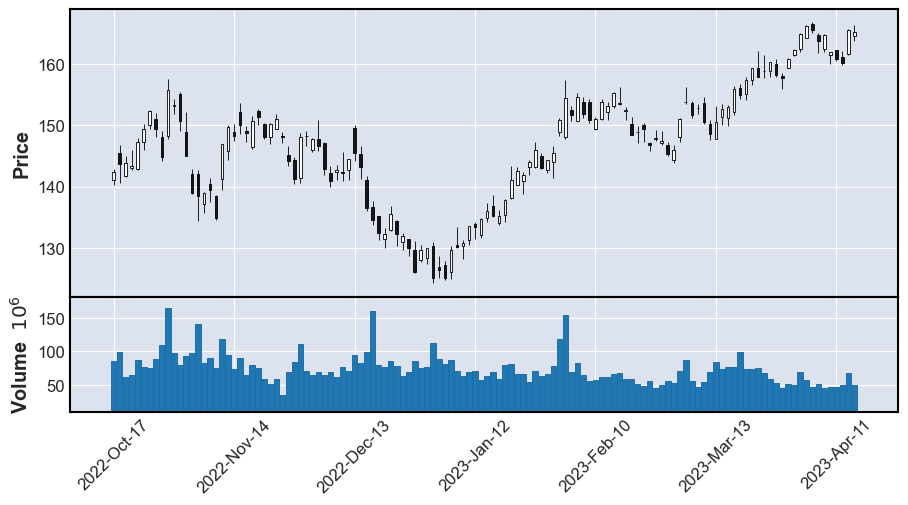

In [30]:
data = yf.download(ticker, period='6mo', interval='1d')

mpf.plot(data, type='candle', volume=True, figratio=(10,5))

In [31]:
df = yf.download(ticker, period='6mo', interval='1d')

price = df['Close']
span = 5
df['sma05'] = price.rolling(window=span).mean()

[*********************100%***********************]  1 of 1 completed


In [32]:
df

,Open,High,Low,Close,Adj Close,Volume,sma05
Date,,,,,,,
2022-10-17,141.070007,142.899994,140.270004,142.410004,141.957413,85250900,NaN
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.293152,99136600,NaN
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.402802,61758300,NaN
2022-10-20,143.020004,145.889999,142.649994,143.389999,142.934296,64522000,NaN
2022-10-21,142.869995,147.850006,142.649994,147.270004,146.801956,86548600,144.136002
...,...,...,...,...,...,...,...
2023-04-10,161.419998,162.029999,160.080002,162.029999,162.029999,47716900,164.450000
2023-04-11,162.350006,162.360001,160.509995,160.800003,160.800003,47644200,163.376001
2023-04-12,161.220001,162.059998,159.779999,160.100006,160.100006,50133100,162.270001


In [33]:
df['sma05'] = price.rolling(window=span, min_periods=1).mean()

In [34]:
df

,Open,High,Low,Close,Adj Close,Volume,sma05
Date,,,,,,,
2022-10-17,141.070007,142.899994,140.270004,142.410004,141.957413,85250900,142.410004
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.293152,99136600,143.080002
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.402802,61758300,143.340001
2022-10-20,143.020004,145.889999,142.649994,143.389999,142.934296,64522000,143.352501
2022-10-21,142.869995,147.850006,142.649994,147.270004,146.801956,86548600,144.136002
...,...,...,...,...,...,...,...
2023-04-10,161.419998,162.029999,160.080002,162.029999,162.029999,47716900,164.450000
2023-04-11,162.350006,162.360001,160.509995,160.800003,160.800003,47644200,163.376001
2023-04-12,161.220001,162.059998,159.779999,160.100006,160.100006,50133100,162.270001


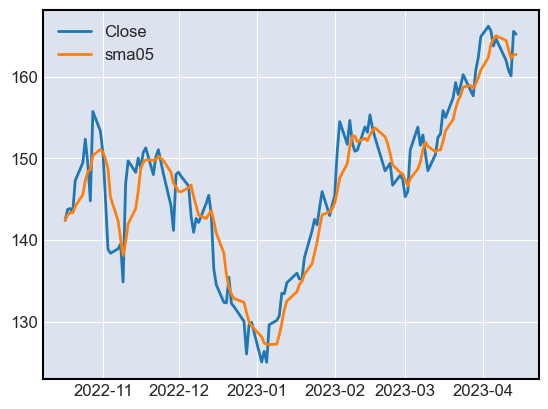

In [35]:
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['sma05'], label='sma05')
plt.legend()

In [36]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
train_data = train_data['Close'].values
test_data = test_data['Close'].values

In [37]:
from statsmodels.tsa.arima.model import ARIMA

In [38]:
model = ARIMA(train_data, order=(6,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   86
Model:                 ARIMA(6, 1, 0)   Log Likelihood                -217.006
Date:                Mon, 17 Apr 2023   AIC                            448.012
Time:                        00:06:46   BIC                            465.110
Sample:                             0   HQIC                           454.889
                                 - 86                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0079      0.140      0.056      0.955      -0.267       0.283
ar.L2         -0.1103      0.154     -0.716      0.474      -0.412       0.191
ar.L3          0.0143      0.124      0.115      0.9

In [39]:
history = [x for x in train_data]
model_predictions =[]
for time_point in range(len(test_data)):
    model = ARIMA(history, order=(6,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)

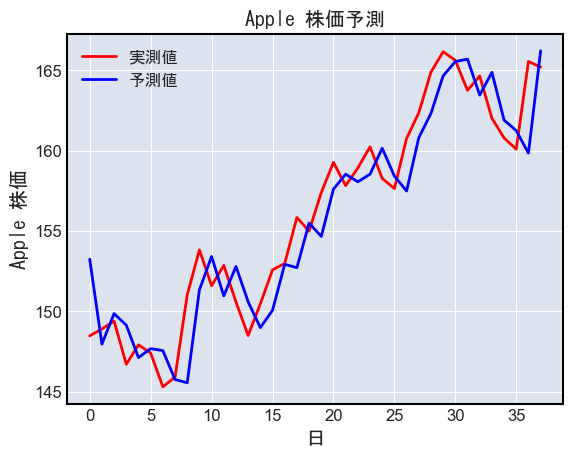

In [40]:
plt.plot(test_data, color='Red', label='実測値')
plt.plot(model_predictions, color='Blue', label='予測値')
plt.title('Apple 株価予測', fontname='MS Gothic')
plt.xlabel('日', fontname='MS Gothic')
plt.ylabel('Apple 株価', fontname='MS Gothic')
plt.legend(prop={'family':'MS Gothic'})
plt.show()